In [3]:
import scipy.special as ss
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


9.283561643835615
-1.8036529680365279


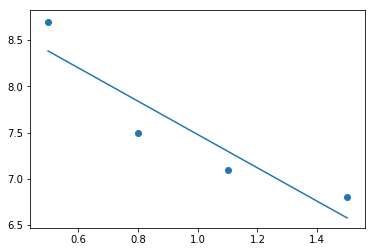

In [5]:
# 5-4 例題(numpyのlstsqで係数算出)
x = np.array([0.5, 0.8, 1.1, 1.5])
y = np.array([8.7, 7.5, 7.1, 6.8])
X = np.vstack((np.ones(len(x)), x)).T

w_0, w_1 = np.linalg.lstsq(X, y)[0]

print(w_0)
print(w_1)

plt.scatter(x, y)
plt.plot(x, w_0+w_1*x)


In [6]:
# 5-4 例題(scikit-learnのLinearRegressionで係数算出)
from sklearn import linear_model

x = np.array([[0.5, 0.8, 1.1, 1.5]])

model = linear_model.LinearRegression()
model.fit(x.T, y)

print(model.coef_)
print(model.intercept_)

[-1.80365297]
9.283561643835617


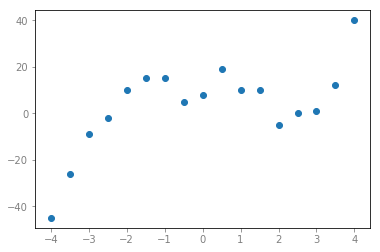

In [10]:
# 5-5 サンプル
# データのプロット
x = np.arange(-4, 4.5, 0.5)
y = np.array([-45, -26, -9, -2, 10, 15, 15, 5, 8, 19, 10, 10, -5, 0, 1, 12, 40])

plt.scatter(x, y)
ax = plt.gca()
ax.tick_params(colors='grey')

        3        2
0.9866 x - 1.19 x - 5.973 x + 10.55


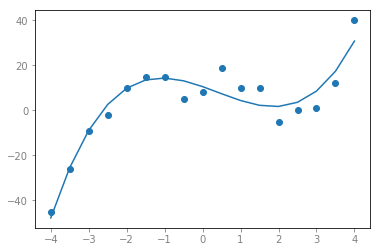

In [11]:
# 5-5 サンプル(numpyのpolyfitで次数を上げて係数算出)
model = linear_model.LinearRegression()
f = np.poly1d(np.polyfit(x, y, 3))
print(f)

plt.scatter(x, y)
ax = plt.gca()
ax.tick_params(colors='grey')
plt.plot(x, f(x))

[[  1.     -4.     16.    -64.   ]
 [  1.     -3.5    12.25  -42.875]
 [  1.     -3.      9.    -27.   ]
 [  1.     -2.5     6.25  -15.625]
 [  1.     -2.      4.     -8.   ]
 [  1.     -1.5     2.25   -3.375]
 [  1.     -1.      1.     -1.   ]
 [  1.     -0.5     0.25   -0.125]
 [  1.      0.      0.      0.   ]
 [  1.      0.5     0.25    0.125]
 [  1.      1.      1.      1.   ]
 [  1.      1.5     2.25    3.375]
 [  1.      2.      4.      8.   ]
 [  1.      2.5     6.25   15.625]
 [  1.      3.      9.     27.   ]
 [  1.      3.5    12.25   42.875]
 [  1.      4.     16.     64.   ]]
[ 0.         -5.97342621 -1.19040248  0.98658411]
10.55417956656347


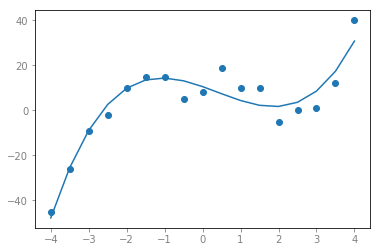

In [12]:
# 5-5 サンプル(scikit-learnのPolynomialFeaturesで次数上げて係数算出)
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
print(X_poly)

model = linear_model.LinearRegression()
model.fit(X_poly, y)

print(model.coef_)
print(model.intercept_)

plt.scatter(x, y)
ax = plt.gca()
ax.tick_params(colors='grey')
plt.plot(x, model.predict(X_poly))

[ 0.         -5.61597157 -1.18795057  0.95845424]
10.539468104440544


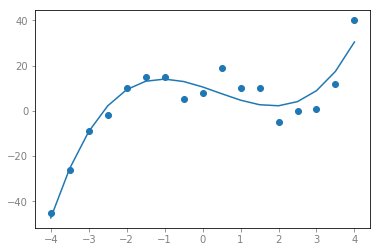

In [13]:
# 5-5 サンプル(scikit-learnのPolynomialFeaturesで次数上げて係数算出)
# L2正則化(Ridge回帰)
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(x.reshape(-1, 1))

model = linear_model.Ridge()
model.fit(X_poly, y)

print(model.coef_)
print(model.intercept_)

plt.scatter(x, y)
ax = plt.gca()
ax.tick_params(colors='grey')
plt.plot(x, model.predict(X_poly))

[ 0.         -4.81954151 -1.15531476  0.89478363]
10.343653250773988


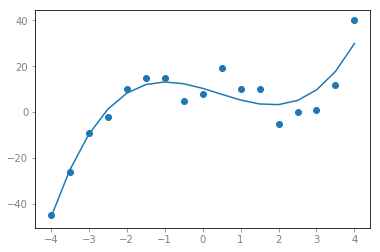

In [14]:
# 5-5 サンプル(scikit-learnのPolynomialFeaturesで次数上げて係数算出)
# L1正則化(Lasso回帰)
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(x.reshape(-1, 1))

model = linear_model.Lasso()
model.fit(X_poly, y)

print(model.coef_)
print(model.intercept_)

plt.scatter(x, y)
ax = plt.gca()
ax.tick_params(colors='grey')
plt.plot(x, model.predict(X_poly))

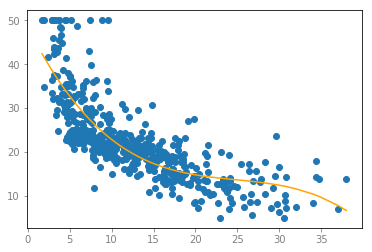

In [18]:
from pandas import DataFrame
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline

boston = load_boston()
df = DataFrame(boston.data, columns=boston.feature_names)

# 目的変数(住宅価格の中央値)をDataFrameへ追加
df['MEDV'] = np.array(boston.target)

plt.scatter(df['LSTAT'], df['MEDV'])
ax = plt.gca()
ax.tick_params(colors='grey')

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', linear_model.Ridge())
])

X = np.array(df['LSTAT']).reshape(-1, 1)
model.fit(X, df['MEDV'])

uX = np.unique(X)
plt.plot(uX, model.predict(uX.reshape(-1, 1)), color='orange')

0.6630284438515945
0.639112219579602


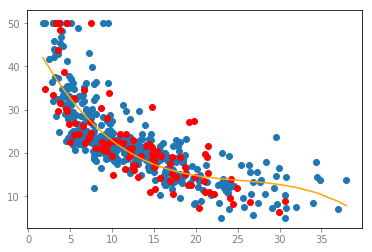

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['LSTAT'], df['MEDV'], test_size=0.2, random_state=100)

plt.scatter(X_train, y_train)
ax = plt.gca()
ax.tick_params(colors='grey')

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', linear_model.Ridge())
])

X = np.array(X_train).reshape(-1, 1)
model.fit(X, y_train)

uX = np.unique(X)
plt.plot(uX, model.predict(uX.reshape(-1, 1)), color='orange')

plt.scatter(X_test, y_test, color='red')

print(model.score(X, y_train))
print(model.score(np.array(X_test).reshape(-1, 1), y_test))
